# test_3
This circuit is the same as test_1, but includes a capactior and inductor. AC analysis was performed at 1 rad/sec and over a range of frequencies. The results are compared to those obtained from LTSpice.  

<img src="test_3.png" width="900">  

In the circuit V2 is set to zero volts and it's the current through V2 that is used as a reference for F1. This is the net list generated by LTSpice.
```
* test_3.asc
R2 2 5 2
V1 1 0 0 AC 1
I1 4 0 9
V2 0 5 0
E1 3 0 1 4 2
F1 2 3 V2 2
R1 1 4 2
C1 1 2 1
L1 4 3 1
;op
.ac list 0.159154943091895
.backanno
.end
```

This is the modified net list, V1 line changed; also need to set the current source, I1, to zero, when solving for voltages and currents.
```
* test_3.asc
R2 2 5 2
V1 1 0 1
I1 4 0 9
V2 0 5 0
E1 3 0 1 4 2
F1 2 3 V2 2
R1 1 4 2
C1 1 2 1
L1 4 3 1
;op
.ac list 0.159154943091895
.backanno
.end
```

This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  
```
                     ⎛       1 ⎞   v₄    
-C₁⋅s⋅v₂ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0
                     ⎝       R₁⎠   R₁    
                     ⎛       1 ⎞   v₅    
-C₁⋅s⋅v₁ + I_F1 + v₂⋅⎜C₁⋅s + ──⎟ - ── = 0
                     ⎝       R₂⎠   R₂    
I_Ea1 - I_F1 - I_L1 = 0
       v₁   v₄      
I_L1 - ── + ── = -I₁
       R₁   R₁      
        v₂   v₅    
-I_V2 - ── + ── = 0
        R₂   R₂    
v₁ = V₁
-v₅ = V₂
-ea₁⋅v₁ + ea₁⋅v₄ + v₃ = 0
I_F1 - I_V2⋅f₁ = 0
-I_L1⋅L₁⋅s - v₃ + v₄ = 0
```


In [1]:
import os
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

Copy the text strings generated by the Symbolic Modified Nodal Analysis Jupyter notebook to the cell below.

In [2]:
I1, R1, v2, V1, v4, I_V2, v3, s, C1, v1, L1, V2, f1, I_V1, ea1, I_L1, I_F1, v5, R2, I_Ea1 = symbols(' I1  R1  v2  V1  v4  I_V2  v3  s  C1  v1  L1  V2  f1  I_V1  ea1  I_L1  I_F1  v5  R2  I_Ea1 ')
A = Matrix([[C1*s + 1/R1, -C1*s, 0, -1/R1, 0, 1, 0, 0, 0, 0], [-C1*s, C1*s + 1/R2, 0, 0, -1/R2, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, -1, -1], [-1/R1, 0, 0, 1/R1, 0, 0, 0, 0, 0, 1], [0, -1/R2, 0, 0, 1/R2, 0, -1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1, 0, 0, 0, 0, 0], [-ea1, 0, 1, ea1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -f1, 0, 1, 0], [0, 0, -1, 1, 0, 0, 0, 0, 0, -L1*s]])
X = Matrix( [v1, v2, v3, v4, v5, I_V1, I_V2, I_Ea1, I_F1, I_L1] )
Z = Matrix( [0, 0, 0, -I1, 0, V1, V2, 0, 0, 0] )

In [3]:
equ = Eq(A*X,Z)
equ

⎡                     ⎛       1 ⎞   v₄⎤        
⎢-C₁⋅s⋅v₂ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ──⎥        
⎢                     ⎝       R₁⎠   R₁⎥        
⎢                                     ⎥        
⎢                     ⎛       1 ⎞   v₅⎥   ⎡ 0 ⎤
⎢-C₁⋅s⋅v₁ + I_F1 + v₂⋅⎜C₁⋅s + ──⎟ - ──⎥   ⎢   ⎥
⎢                     ⎝       R₂⎠   R₂⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢         I_Ea1 - I_F1 - I_L1         ⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                  v₁   v₄            ⎥   ⎢-I₁⎥
⎢           I_L1 - ── + ──            ⎥   ⎢   ⎥
⎢                  R₁   R₁            ⎥   ⎢ 0 ⎥
⎢                                     ⎥ = ⎢   ⎥
⎢                   v₂   v₅           ⎥   ⎢V₁ ⎥
⎢           -I_V2 - ── + ──           ⎥   ⎢   ⎥
⎢                   R₂   R₂           ⎥   ⎢V₂ ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                 v₁                  ⎥   ⎢ 0 ⎥
⎢                                     ⎥   ⎢   ⎥
⎢                 -v₅                 ⎥ 

## Symbolic solution

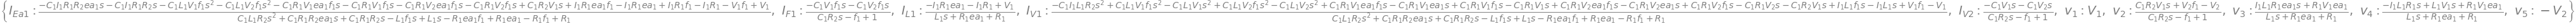

In [4]:
symbolic_solution = solve(equ,X)
symbolic_solution

In [5]:
left_side = list(symbolic_solution.keys())
right_side = list(symbolic_solution.values())

for i in range(len(symbolic_solution)):
    pprint(Eq(left_side[i],right_side[i]))

v₁ = V₁
     C₁⋅R₂⋅V₁⋅s + V₂⋅f₁ - V₂
v₂ = ───────────────────────
         C₁⋅R₂⋅s - f₁ + 1   
     I₁⋅L₁⋅R₁⋅ea₁⋅s + R₁⋅V₁⋅ea₁
v₃ = ──────────────────────────
         L₁⋅s + R₁⋅ea₁ + R₁    
     -I₁⋅L₁⋅R₁⋅s + L₁⋅V₁⋅s + R₁⋅V₁⋅ea₁
v₄ = ─────────────────────────────────
             L₁⋅s + R₁⋅ea₁ + R₁       
v₅ = -V₂
                      2                2             2                2       
       - C₁⋅I₁⋅L₁⋅R₂⋅s  + C₁⋅L₁⋅V₁⋅f₁⋅s  - C₁⋅L₁⋅V₁⋅s  + C₁⋅L₁⋅V₂⋅f₁⋅s  - C₁⋅L
I_V1 = ───────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

      2                                                                       
₁⋅V₂⋅s  + C₁⋅R₁⋅V₁⋅ea₁⋅f₁⋅s - C₁⋅R₁⋅V₁⋅ea₁⋅s + C₁⋅R₁⋅V₁⋅f₁⋅s - C₁⋅R₁⋅V₁⋅s + C₁
──────────────────────────────────────────────────────────────────────────────
                       2                          

## Numeric solution
Substitue the element values into the equations and solve for unknown node voltages and currents. Need to set the current source, I1, to zero.

In [6]:
# enter the element values
equ1a = equ.subs({    
R2:2.000000,
V1:1.000000,
I1:0.000000,
V2:0.000000,
ea1:2.000000,
f1:2.000000,
R1:2.000000,
C1:1.000000,
L1:1.000000})

equ1a  # display the equations

⎡I_V1 - s⋅v₂ + v₁⋅(1.0⋅s + 0.5) - 0.5⋅v₄⎤   ⎡ 0 ⎤
⎢                                       ⎥   ⎢   ⎥
⎢I_F1 - s⋅v₁ + v₂⋅(1.0⋅s + 0.5) - 0.5⋅v₅⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢          I_Ea1 - I_F1 - I_L1          ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        I_L1 - 0.5⋅v₁ + 0.5⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        -I_V2 - 0.5⋅v₂ + 0.5⋅v₅        ⎥   ⎢ 0 ⎥
⎢                                       ⎥ = ⎢   ⎥
⎢                  v₁                   ⎥   ⎢1.0⎥
⎢                                       ⎥   ⎢   ⎥
⎢                  -v₅                  ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢         -2.0⋅v₁ + v₃ + 2.0⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢            I_F1 - 2.0⋅I_V2            ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎣           -I_L1⋅s - v₃ + v₄           ⎦   ⎣ 0 ⎦

Solve for voltages and currents in terms of Laplace variable s.

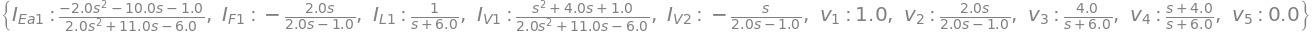

In [7]:
u1 = solve(equ1a,X)
u1

## AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

In [8]:
equ1a_1rad_per_s = equ1a.subs({s:1j})
equ1a_1rad_per_s  # display the equations

⎡I_V1 + v₁⋅(0.5 + 1.0⋅ⅈ) - ⅈ⋅v₂ - 0.5⋅v₄⎤   ⎡ 0 ⎤
⎢                                       ⎥   ⎢   ⎥
⎢I_F1 - ⅈ⋅v₁ + v₂⋅(0.5 + 1.0⋅ⅈ) - 0.5⋅v₅⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢          I_Ea1 - I_F1 - I_L1          ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        I_L1 - 0.5⋅v₁ + 0.5⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢        -I_V2 - 0.5⋅v₂ + 0.5⋅v₅        ⎥   ⎢ 0 ⎥
⎢                                       ⎥ = ⎢   ⎥
⎢                  v₁                   ⎥   ⎢1.0⎥
⎢                                       ⎥   ⎢   ⎥
⎢                  -v₅                  ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢         -2.0⋅v₁ + v₃ + 2.0⋅v₄         ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎢            I_F1 - 2.0⋅I_V2            ⎥   ⎢ 0 ⎥
⎢                                       ⎥   ⎢   ⎥
⎣           -ⅈ⋅I_L1 - v₃ + v₄           ⎦   ⎣ 0 ⎦

In [9]:
ans1 = solve(equ1a_1rad_per_s,X)
ans1

In [10]:
for name, value in ans1.items():
    print('{:5s}: mag: {:10.6f} phase: {:11.5f} deg'.format(str(name),float(abs(value)),float(arg(value)*180/np.pi)))

v1   : mag:   1.000000 phase:     0.00000 deg
v2   : mag:   0.894427 phase:   -26.56505 deg
v3   : mag:   0.657596 phase:    -9.46232 deg
v4   : mag:   0.677834 phase:     4.57392 deg
v5   : mag:   0.000000 phase:         nan deg
I_V1 : mag:   0.294086 phase:   -36.02737 deg
I_V2 : mag:   0.447214 phase:   153.43495 deg
I_Ea1: mag:   0.738882 phase:   149.68322 deg
I_F1 : mag:   0.894427 phase:   153.43495 deg
I_L1 : mag:   0.164399 phase:    -9.46232 deg


The solution obtained from LTSpice at a frequency of 0.159155 Hz is shown below.
```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(2):	mag:   0.894427 phase:   -26.5651° 	voltage
V(5):	mag:          0 phase:          0° 	voltage
V(1):	mag:          1 phase:          0° 	voltage
V(4):	mag:   0.677834 phase:    4.57392° 	voltage
V(3):	mag:   0.657596 phase:   -9.46232° 	voltage
I(C1):	mag:   0.447214 phase:    153.435° 	device_current
I(F1):	mag:   0.894427 phase:    153.435° 	device_current
I(L1):	mag:   0.164399 phase:   -9.46232° 	device_current
I(I1):	mag:          0 phase:          0° 	device_current
I(R2):	mag:   0.447214 phase:   -26.5651° 	device_current
I(R1):	mag:   0.164399 phase:   -9.46232° 	device_current
I(E1):	mag:   0.738882 phase:    149.683° 	device_current
I(V1):	mag:   0.294086 phase:   -36.0274° 	device_current
I(V2):	mag:   0.447214 phase:    153.435° 	device_current
```

The LTSpice results are the same.

## AC Sweep
Looking at node 2 voltage and comparing the results with those obtained from LTSpice. Thr frequenct weep is from 0.01 Hz to 1 Hz.

In [11]:
H = u1[v2]
H

In [12]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system_c1 = (a, b) # system for circuit 1

In [13]:
x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 10000, endpoint=True)
w_c1, mag_c1, phase_c1 = signal.bode(system_c1, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 2 voltage over the sweep range and plot along with the results obtained from SymPy.

In [14]:
os.chdir('/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Test Circuits/test_3/') # change directory to net list location

fn = 'test_3.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# change the working director back to the Jupyter folder
os.chdir('/home/jeff32/Documents/JupyterLab/Node Analysis/')  

In [15]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

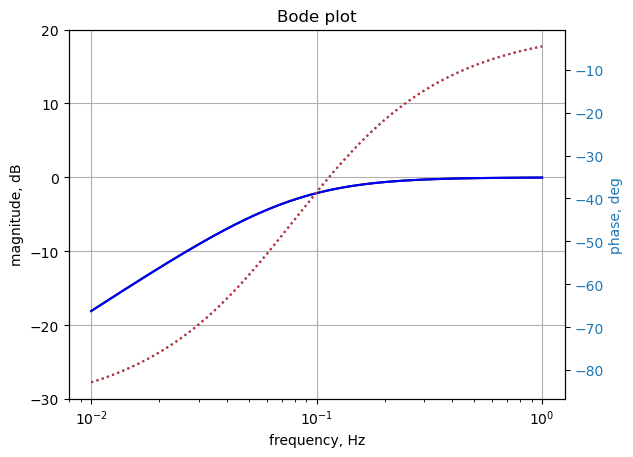

In [16]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-k')    # Bode magnitude plot
plt.semilogx(w_c1/(2*np.pi), mag_c1,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

The SymPy and LTSpice results overlay each other. 